1.使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列

2.使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。 使用describe()方法生成数据的描述性统计信息。

In [1]:
import pandas as pd

file_path = 'D:/github_bot_processed_data.csv'
df = pd.read_csv(file_path)
pd.set_option('display.max_rows', 100)  # 设置显示最多 100 行
pd.set_option('display.max_columns', 50)  # 设置显示最多 50 列
pd.set_option('display.max_colwidth', 100)  # 设置显示列的最大宽度
pd.set_option('display.float_format', '{:.3f}'.format)  # 设置浮动数值精度为 3 位小数
print(df.head())
print(df.info())
print(df.describe())
print(df.shape)

   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                             bio  \
0                                                            NaN   
1  I just press the buttons randomly, and the program evolves...   
2                     Time is unimportant,\nonly life important.   
3                                                            NaN   
4                                                            NaN   

   public_repos  public_gists  followers  following  \
0            26             1          5          1   
1            30             3          9          6   
2           103            49

3.对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。

In [ ]:
import pandas as pd

file_path = 'D:/github_bot_processed_data.csv'
df = pd.read_csv(file_path)
print("数据集中的列名:")
print(df.columns)
# 日期格式化
if 'created_at' in df.columns:
    df['created_at'] = pd.to_datetime(df['created_at'])  # 将 'created_at' 列转换为日期时间格式
    df['formatted_date'] = df['created_at'].dt.strftime('%Y-%m-%d')  # 格式化为 'yyyy-mm-dd'
else:
    print("未找到 'created_at' 列，数据集中的列名如下：", df.columns)
print("\n格式化后的 'created_at' 数据:")
print(df[['created_at', 'formatted_date']])

def format_by_type(row):
    # 日期格式化
    if row['type'] == 'date' and 'created_at' in df.columns:
        row['formatted_created_at'] = pd.to_datetime(row['created_at']).strftime('%Y-%m-%d')
    if row['type'] == 'date' and 'updated_at' in df.columns:
        row['formatted_updated_at'] = pd.to_datetime(row['updated_at']).strftime('%Y-%m-%d')
    # 数值格式化
    if row['type'] == 'number' and 'followers' in df.columns:
        row['formatted_followers'] = "{:,}".format(row['followers'])
    if row['type'] == 'number' and 'following' in df.columns:
        row['formatted_following'] = "{:,}".format(row['following'])
    # 如果列中没有该类型，则保留原值
    row['formatted_created_at'] = row.get('formatted_created_at', row.get('created_at', ''))
    row['formatted_updated_at'] = row.get('formatted_updated_at', row.get('updated_at', ''))
    row['formatted_followers'] = row.get('formatted_followers', row.get('followers', ''))
    row['formatted_following'] = row.get('formatted_following', row.get('following', ''))
    
    return row
# 对数据按行进行格式化处理
df = df.apply(format_by_type, axis=1)
# 输出格式化后的数据
print("\n格式化后的数据:")
print(df[['created_at', 'formatted_created_at', 'updated_at', 'formatted_updated_at', 'followers', 'formatted_followers', 'following', 'formatted_following']])

数据集中的列名:
Index(['label', 'type', 'site_admin', 'company', 'blog', 'location',
       'hireable', 'bio', 'public_repos', 'public_gists', 'followers',
       'following', 'created_at', 'updated_at', 'text_bot_count'],
      dtype='object')

格式化后的 'created_at' 数据:
                     created_at formatted_date
0     2011-09-26 17:27:03+00:00     2011-09-26
1     2015-06-29 10:12:46+00:00     2015-06-29
2     2008-08-29 16:20:03+00:00     2008-08-29
3     2014-05-20 18:43:09+00:00     2014-05-20
4     2012-08-16 14:19:13+00:00     2012-08-16
...                         ...            ...
19763 2014-07-02 23:27:34+00:00     2014-07-02
19764 2017-12-06 21:56:31+00:00     2017-12-06
19765 2015-11-14 14:44:05+00:00     2015-11-14
19766 2021-11-23 18:55:29+00:00     2021-11-23
19767 2016-04-22 22:11:59+00:00     2016-04-22

[19768 rows x 2 columns]

格式化后的数据:
                     created_at      formatted_created_at  \
0     2011-09-26 17:27:03+00:00 2011-09-26 17:27:03+00:00   
1     2015-06-29

4.对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。

In [12]:
import pandas as pd
import numpy as np

file_path = 'D:/github_bot_processed_data.csv'
df = pd.read_csv(file_path)

df['log_public_repos'] = np.log(df['public_repos'] + 1)
df['log_public_gists'] = np.log(df['public_gists'] + 1)
df['log_followers'] = np.log(df['followers'] + 1)
df['log_following'] = np.log(df['following'] + 1)

print(df[['public_repos', 'log_public_repos', 'public_gists', 'log_public_gists', 
          'followers', 'log_followers', 'following', 'log_following']].head())

   public_repos  log_public_repos  public_gists  log_public_gists  followers  \
0            26             3.296             1             0.693          5   
1            30             3.434             3             1.386          9   
2           103             4.644            49             3.912       1212   
3            49             3.912             0             0.000         84   
4            11             2.485             1             0.693          6   

   log_followers  following  log_following  
0          1.792          1          0.693  
1          2.303          6          1.946  
2          7.101        221          5.403  
3          4.443          2          1.099  
4          1.946          2          1.099  


5.使用Matplotlib绘制图表
绘制条形图：展示label列的类别分布。
绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
绘制直方图：展示log_public_repos的对数变换后的数据分布。
绘制散点图：展示public_repos与followers之间的关系。
绘制散点矩阵：展示多个数值型特征之间的成对关系。

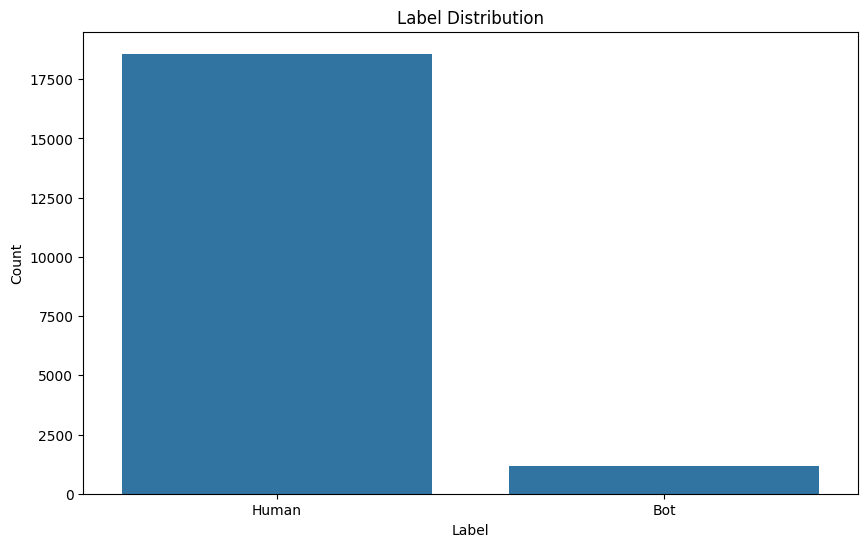

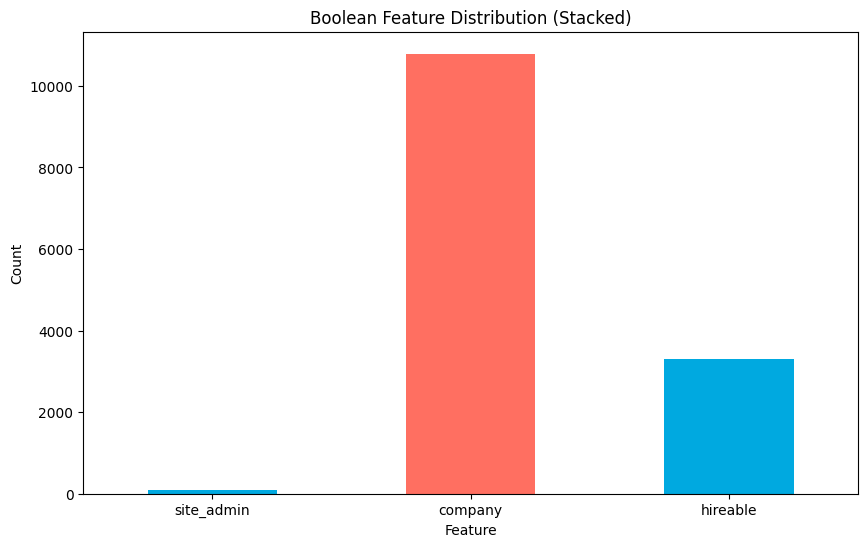

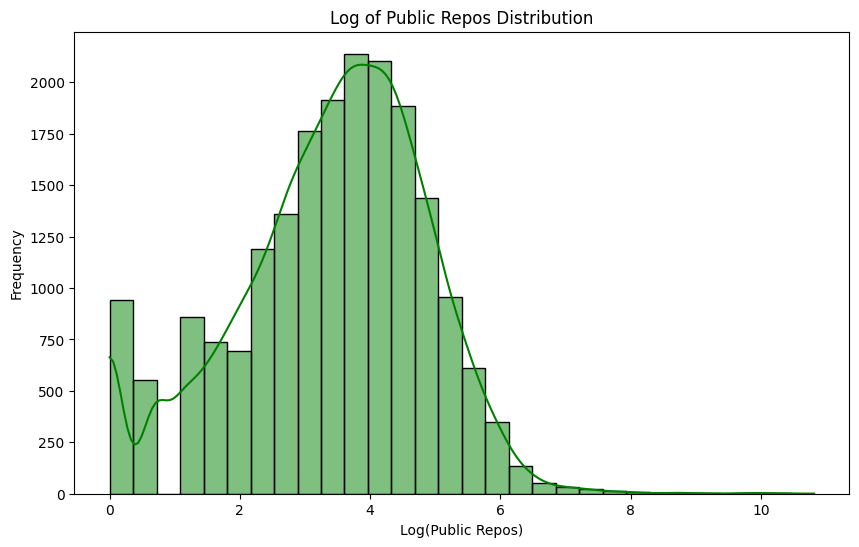

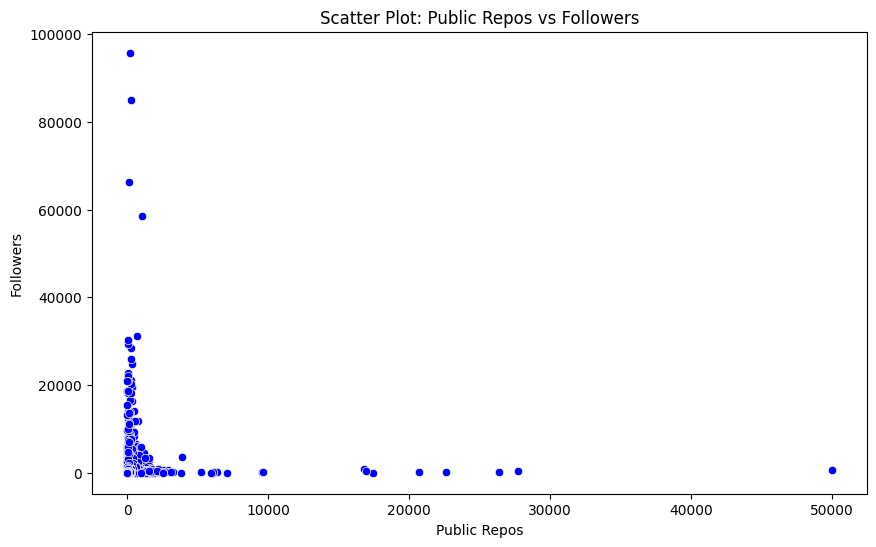

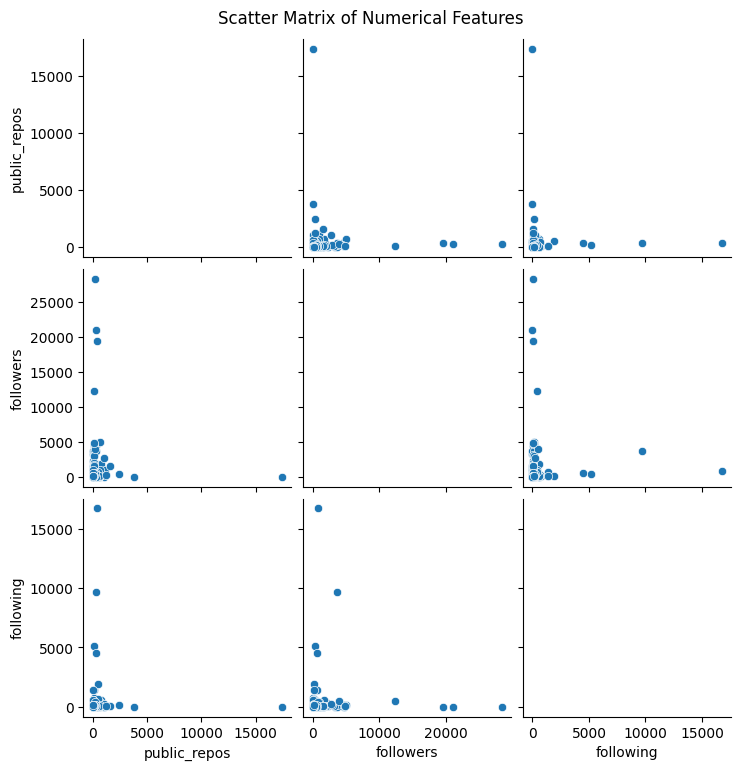

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = 'D:/github_bot_processed_data.csv'
df = pd.read_csv(file_path)

# 绘制条形图
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='label')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# 绘制堆积柱状图   
bool_columns = ['site_admin', 'company', 'hireable']
bool_data = df[bool_columns].astype(int)  # 将布尔值转换为 0 和 1

bool_data_sum = bool_data.sum(axis=0)
plt.figure(figsize=(10, 6))
bool_data_sum.plot(kind='bar', stacked=True, color=['#00A9E0', '#FF6F61'])
plt.title('Boolean Feature Distribution (Stacked)')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# 绘制 'log_public_repos' 列的直方图
df['log_public_repos'] = np.log1p(df['public_repos']) 

plt.figure(figsize=(10, 6))
sns.histplot(df['log_public_repos'], kde=True, color='green', bins=30)
plt.title('Log of Public Repos Distribution')
plt.xlabel('Log(Public Repos)')
plt.ylabel('Frequency')
plt.show()

# 绘制 'public_repos' 与 'followers' 之间的散点图
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['public_repos'], y=df['followers'], color='blue')
plt.title('Scatter Plot: Public Repos vs Followers')
plt.xlabel('Public Repos')
plt.ylabel('Followers')
plt.show()

# 绘制散点矩阵，展示多个数值型特征之间的关系
numeric_columns = ['public_repos', 'followers', 'following']
df_sample = df.head(1000)
sns.pairplot(df_sample[numeric_columns], height=2.5, diag_kind='none')
plt.suptitle('Scatter Matrix of Numerical Features', y=1.02)
plt.show()

6.使用Seaborn绘制图表
绘制箱线图：展示不同label类别下log_followers的分布。
绘制成对图：展示不同特征之间的成对关系，并根据label分类。
绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
绘制小提琴图：展示label与log_followers之间的分布差异。

   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                             bio  \
0                                                            NaN   
1  I just press the buttons randomly, and the program evolves...   
2                     Time is unimportant,\nonly life important.   
3                                                            NaN   
4                                                            NaN   

   public_repos  public_gists  followers  following  \
0            26             1          5          1   
1            30             3          9          6   
2           103            49

C:\Users\肖\AppData\Local\Temp\ipykernel_26700\2214632784.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='log_followers', data=df, palette="Set2")


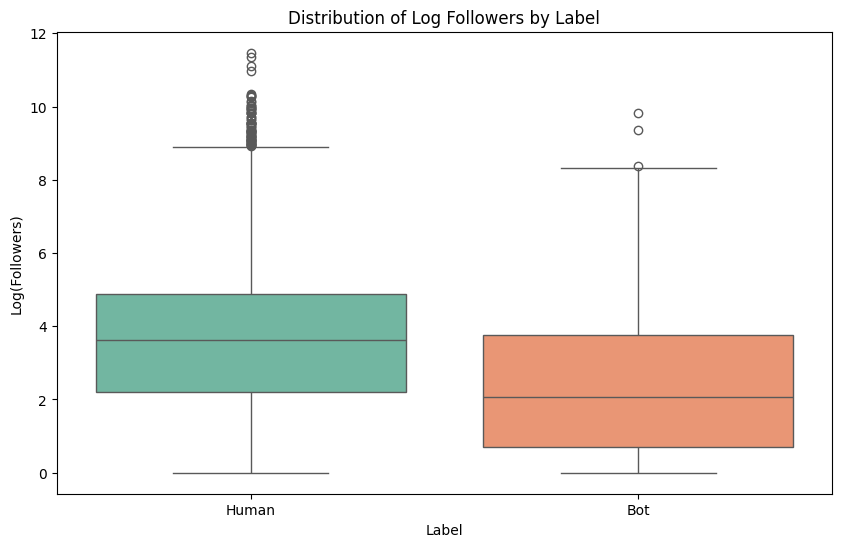

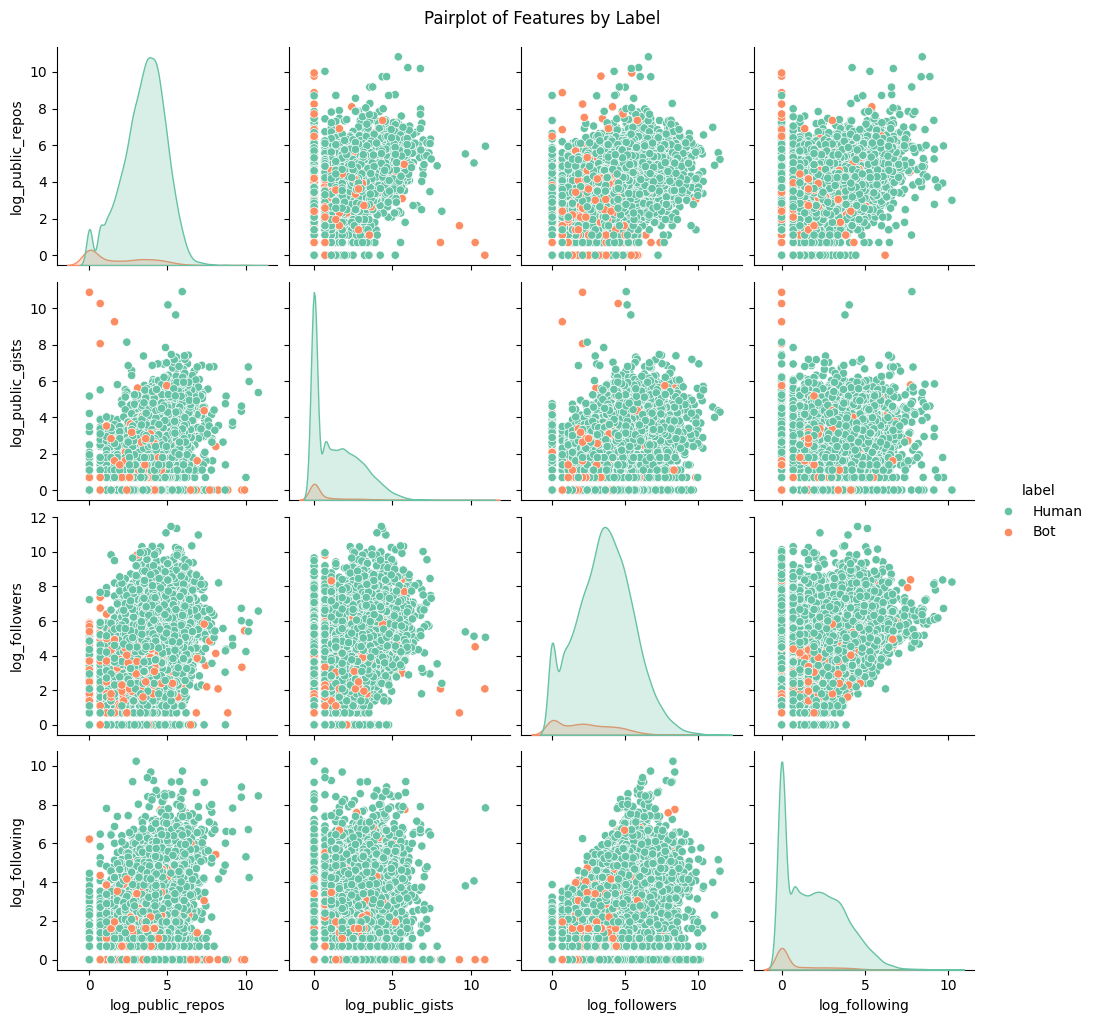

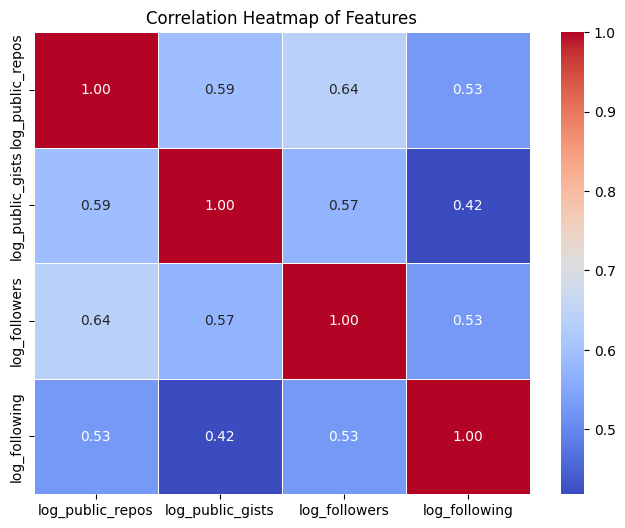

C:\Users\肖\AppData\Local\Temp\ipykernel_26700\2214632784.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='label', y='log_followers', data=df, palette="Set2")


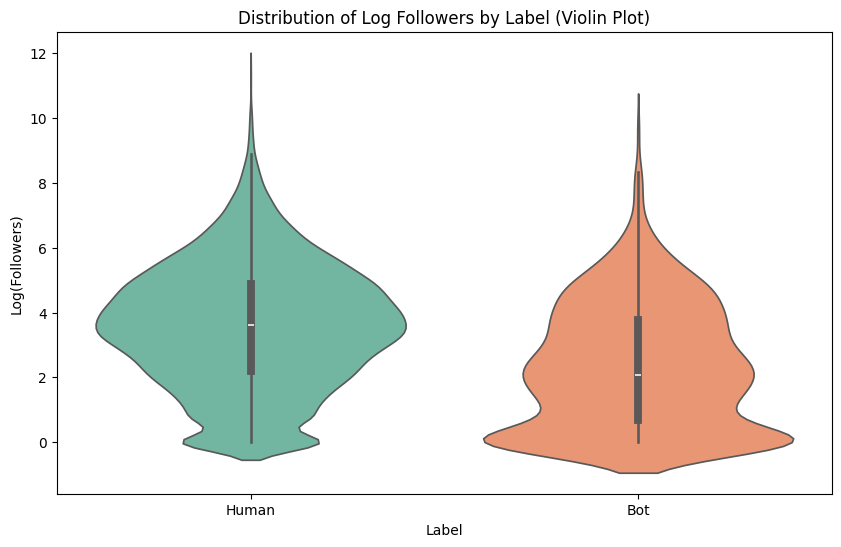

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 读取数据
file_path = r'D:\github_bot_processed_data.csv'
df = pd.read_csv(file_path)

# 查看数据前几行，确保加载正确
print(df.head())

# 处理对数变换（log transformation）: 这里只对public_repos、public_gists、followers、following列进行对数变换
df['log_public_repos'] = np.log(df['public_repos'] + 1)  # 加1避免对数为负无穷
df['log_public_gists'] = np.log(df['public_gists'] + 1)
df['log_followers'] = np.log(df['followers'] + 1)
df['log_following'] = np.log(df['following'] + 1)

# 1. 绘制箱线图，展示不同 label 类别下 log_followers 的分布
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='log_followers', data=df, palette="Set2")
plt.title('Distribution of Log Followers by Label')
plt.xlabel('Label')
plt.ylabel('Log(Followers)')
plt.show()

# 2. 绘制成对图，展示不同特征之间的成对关系，并根据 label 分类
numeric_columns = ['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']
sns.pairplot(df[numeric_columns + ['label']], hue='label', height=2.5, palette="Set2")
plt.suptitle('Pairplot of Features by Label', y=1.02)
plt.show()

# 3. 绘制热图，展示 log_public_repos、log_public_gists、log_followers 和 log_following 等特征之间的相关性
correlation_matrix = df[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

# 4. 绘制小提琴图，展示 label 与 log_followers 之间的分布差异
plt.figure(figsize=(10, 6))
sns.violinplot(x='label', y='log_followers', data=df, palette="Set2")
plt.title('Distribution of Log Followers by Label (Violin Plot)')
plt.xlabel('Label')
plt.ylabel('Log(Followers)')
plt.show()


7.使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。

In [1]:
import pandas as pd
from ydata_profiling import ProfileReport

file_path = r'D:\github_bot_processed_data.csv'
df = pd.read_csv(file_path)

profile = ProfileReport(df, title="GitHub Bot Processed Data Analysis", explorative=True)
profile.to_file("github_bot_processed_data_report.html")


c:\Users\肖\Desktop\code\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 61.02it/s]
